In [ ]:
paquetes <- c("bkmr", "dplyr", "ggplot2", "future", "readxl")

# Installing the required packages
nuevos_paquetes <- paquetes[!(paquetes %in% installed.packages()[, "Package"])]
if(length(nuevos_paquetes)) install.packages(nuevos_paquetes)
library(bkmr)
library(dplyr) #Charged for easier data manipulation. Part of the tidyverse.
library(ggplot2) #To make graphics
library(future) #For parallelization

library(readxl)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘dotCall64’, ‘sandwich’, ‘spam’, ‘maps’, ‘mvtnorm’, ‘gmm’, ‘fields’, ‘truncnorm’, ‘tmvtnorm’, ‘globals’, ‘listenv’, ‘parallelly’


For guided examples, go to 'https://jenfb.github.io/bkmr/overview.html'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Reading the excel with the data
datos <- read_excel("datos_limpios_2.xlsx")

# Tranformation of categorical variables to numerics since bkmr only works with numeric variables
dataset <- datos %>%
  mutate(
    femb = ifelse(femb == "Sí", 1, ifelse(femb == "No", 0, NA)),
    preterm = ifelse(preterm == "sí", 1, ifelse(preterm == "no", 0, NA)),
    alcohol = ifelse(alcohol == "Si", 1, ifelse(alcohol == "No", 0, NA)),
    CSMIX3 = case_when(
      CSMIX3 == "CS I+II" ~ 1,
      CSMIX3 == "CS III"  ~ 2,
      CSMIX3 == "CS IV+V" ~ 3,
      TRUE               ~ NA_real_
    ),
    tipozonaM = case_when(
      tipozonaM == "Rural"     ~ 1,
      tipozonaM == "Semiurbana" ~ 2,
      tipozonaM == "Urbana"     ~ 3,
      TRUE                   ~ NA_real_
    )
  )

# visualizing the dataset
print(dataset)


# A tibble: 1,147 × 20
   idnum  femb preterm sexo  madre_menarquia CSMIX3 imcm2 paridad tipozonaM
   <dbl> <dbl>   <dbl> <chr>           <dbl>  <dbl> <dbl>   <dbl>     <dbl>
 1     1     1       0 niña               14      2  18.1       0         2
 2     2     0       0 niña               14      1  19.9       0         3
 3     3     1       0 niña               12      3  19.4       0         3
 4     4     0       0 niña               11      3  32.8       1         3
 5     5     0       0 niña               13      2  24.5       2         2
 6     6     0       0 niña               13      1  19.7       1         3
 7     7     1       0 niña               13      2  21.5       0         3
 8     8     0       0 niña               13      1  24.3       1         3
 9     9     0       0 niña               11      2  21.8       0         3
10    10     0       0 niña               15      3  19.7       1         3
# ℹ 1,137 more rows
# ℹ 11 more variables: alcohol <dbl>, pfhxs <

In [ ]:
dataset

idnum,femb,preterm,sexo,madre_menarquia,CSMIX3,imcm2,paridad,tipozonaM,alcohol,pfhxs,pfoa,pfos,pfna,v_44DDT,v_44DDE,HCB,bHCH,PCBtotal3,edad_menarquia
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,niña,14,2,18.14487,0,2,0,0.4227715,2.1766347,4.308855,0.4841333,0.05164915,0.5117618,1.34794464,0.41357629,1.1856393,10
2,0,0,niña,14,1,19.92188,0,3,1,0.6231748,9.3153954,4.551944,1.5336928,0.05164915,0.5117618,0.56723281,0.15895242,1.1157143,12
3,1,0,niña,12,3,19.38214,0,3,1,0.5053736,2.5760702,10.163727,0.7878010,0.05164915,0.5117618,0.71105713,0.15208330,0.5326982,11
4,0,0,niña,11,3,32.76939,1,3,0,0.5143138,2.4776540,4.297271,0.4382159,0.22459549,2.5986964,1.07573408,0.39352154,0.6773432,12
5,0,0,niña,13,2,24.46460,2,2,0,0.4138227,2.4218013,10.445153,0.5684689,0.08788063,0.8184657,0.59727927,0.21667730,1.2128971,10
6,0,0,niña,13,1,19.72104,1,3,0,0.6542281,1.7852172,6.584816,0.6192166,0.08934201,1.5666514,0.36548560,0.20951244,1.2262210,13
7,1,0,niña,13,2,21.45357,0,3,1,2.1784260,3.6813202,10.367922,0.9130613,0.00536070,2.1618015,0.64622944,0.23581784,1.1846394,13
8,0,0,niña,13,1,24.30462,1,3,0,0.7139019,2.2755961,5.674081,0.6203398,0.07912374,1.1344003,0.38945777,0.07234673,0.4547635,9
9,0,0,niña,11,2,21.82995,0,3,1,0.3260341,1.8672714,5.547688,0.4960904,0.05164915,0.5117618,0.37503736,0.04383915,2.6888555,11


In [ ]:
# Outcome variable
y <- dataset$edad_menarquia

# Exposure variables
Z <- as.matrix(dataset[, c("pfhxs", "pfoa", "pfos", "pfna",
                           "v_44DDT", "v_44DDE", "HCB", "bHCH", "PCBtotal3")])

# Context variables
X <- as.matrix(dataset[, c("femb", "preterm", "imcm2", "paridad")])


In [ ]:
if(!"coda" %in% installed.packages()[, "Package"]){
  install.packages("coda")
}
library(coda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# In this part of the code, what we do is compare the number of iterations within our BKMR
# to determine which number is the best based on the cost/result ratio.
# That is, the cost increases almost constantly with the number of iterations,
# but as the iterations increase, the change in result varies.
# Therefore, we will choose the one that has the best result and a reasonably good cost
# based on our own criteria.

iter_list <- c(2000, 4000, 6000, 8000, 10000)
burnin_prop <- 0.25  # Se descarta el 25% de las iteraciones como burn-in

# Data frame to store the ESS results
ess_results <- data.frame(Iteration = numeric(), min_ESS = numeric())

# for loop to try all the different number of iterations
for (n_iter in iter_list) {
  set.seed(1234)
  cat("Corriendo modelo con", n_iter, "iteraciones...\n")

  # Adjusting the bkmr model
  fit_i <- kmbayes(
    y = y,
    Z = Z,
    X = X,
    iter = n_iter,
    varsel = TRUE,
    verbose = TRUE
  )

  # Calculating the burn-in
  burnin <- floor(n_iter * burnin_prop)
  beta_chain <- fit_i$beta[(burnin + 1):n_iter, , drop = FALSE]

  # Transform to MCM object and calculate the ESS
  mcmc_beta <- mcmc(beta_chain)
  ess <- effectiveSize(mcmc_beta)
  min_ess <- min(ess)

  # Storing and showing the results
  ess_results <- rbind(ess_results, data.frame(Iteration = n_iter, min_ESS = min_ess))
  cat("Iteraciones =", n_iter, "; Minimum ESS =", min_ess, "\n\n")
}

# Final results
print(ess_results)

In [ ]:
#Train a BKMR model with the optimal number of iterations obtained in the chunk above
fit_bkmr <- kmbayes(
  y = y,
  Z = Z,
  X = X,
  iter = 6000,       # Number of iterations
  varsel = TRUE,
  verbose = TRUE     # Show progress
)

Iteration: 600 (10% completed; 3.00539 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.28213689
2 r/delta (overall) 0.34223706
3 r/delta  (move 1) 0.04929577
4 r/delta  (move 2) 0.60634921



Iteration: 1200 (20% completed; 5.91182 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.40783987
2 r/delta (overall) 0.30859049
3 r/delta  (move 1) 0.04232804
4 r/delta  (move 2) 0.54746835



Iteration: 1800 (30% completed; 8.88042 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.44969427
2 r/delta (overall) 0.29905503
3 r/delta  (move 1) 0.03908046
4 r/delta  (move 2) 0.54251884



Iteration: 2400 (40% completed; 11.85639 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.46811171
2 r/delta (overall) 0.28845352
3 r/delta  (move 1) 0.03630078
4 r/delta  (move 2) 0.52334944



Iteration: 3000 (50% completed; 14.77749 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.47482494
2 r/delta (overall) 0.28409470
3 r/delta  (move 1) 0.03412969
4 r/delta  (move 2) 0.52281617



Iteration: 3600 (60% completed; 17.7338 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param      rate
1            lambda 0.4831898
2 r/delta (overall) 0.2820228
3 r/delta  (move 1) 0.0306644
4 r/delta  (move 2) 0.5228509



Iteration: 4200 (70% completed; 20.69614 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.49059300
2 r/delta (overall) 0.27982853
3 r/delta  (move 1) 0.03120429
4 r/delta  (move 2) 0.51722533



Iteration: 4800 (80% completed; 23.61104 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.49176912
2 r/delta (overall) 0.27984997
3 r/delta  (move 1) 0.02995293
4 r/delta  (move 2) 0.51705930



Iteration: 5400 (90% completed; 26.56091 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.49916651
2 r/delta (overall) 0.27523615
3 r/delta  (move 1) 0.02756508
4 r/delta  (move 2) 0.50735558



Iteration: 6000 (100% completed; 29.4865 mins elapsed)



Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.50008335
2 r/delta (overall) 0.27237873
3 r/delta  (move 1) 0.02552604
4 r/delta  (move 2) 0.50322581


In [ ]:
# Quick summary
summary(fit_bkmr)

Fitted object of class 'bkmrfit'
Iterations: 6000 
Outcome family: gaussian  
Model fit on: 2025-05-09 16:54:35.709433 
Running time:  29.48666 mins 

Acceptance rates for Metropolis-Hastings algorithm:
              param       rate
1            lambda 0.50008335
2 r/delta (overall) 0.27237873
3 r/delta  (move 1) 0.02552604
4 r/delta  (move 2) 0.50322581

Parameter estimates (based on iterations 3001-6000):
       param     mean      sd    q_2.5   q_97.5
1      beta1 -0.13514 0.07823 -0.28918  0.01564
2      beta2  1.55560 0.30441  0.96835  2.15121
3      beta3 -0.01107 0.01161 -0.03376  0.01122
4      beta4  0.00483 0.05907 -0.10882  0.11687
5  sigsq.eps  0.63090 0.03661  0.56125  0.70113
6         r1  0.42212 0.10580  0.24400  0.65036
7         r2  0.04530 0.02085  0.02194  0.09781
8         r3  0.01440 0.00357  0.01185  0.02057
9         r4  0.08351 0.04752  0.01937  0.19889
10        r5  0.04058 0.04213  0.00000  0.19804
11        r6  0.01099 0.00000  0.01099  0.01099
12        r7

NULL

In [ ]:
ExtractPIPs(fit_bkmr)
#PIP obtained

variable,PIP
<chr>,<dbl>
pfhxs,1.0000000
pfoa,1.0000000
pfos,1.0000000
pfna,1.0000000
v_44DDT,0.9383333
v_44DDE,1.0000000
HCB,1.0000000
bHCH,1.0000000
PCBtotal3,1.0000000


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


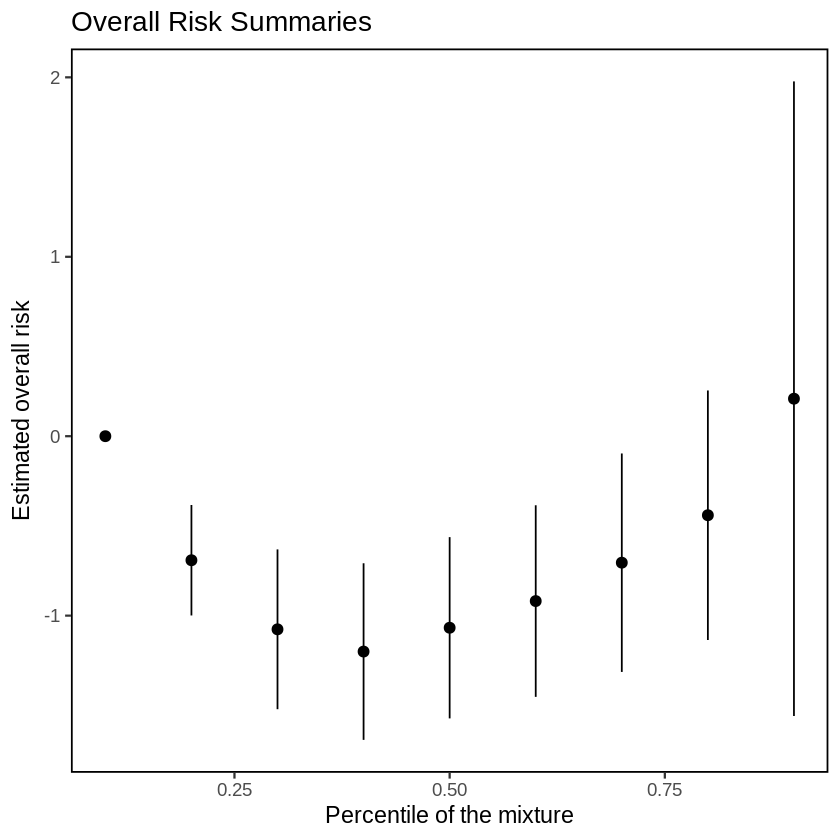

In [ ]:
risks.overall <- OverallRiskSummaries(fit = fit_bkmr, y = fit_bkmr$y, Z = fit_bkmr$Z, X = fit_bkmr$X,
                                      qs = seq(0.1, 0.9, by = 0.10), #The percentile to display
                                      q.fixed = 0.1, method = "exact") #exact is more precise but slower than "approx"

ggplot(risks.overall, aes(quantile, est, ymin = est - 1.96*sd, ymax = est + 1.96*sd)) +
  geom_pointrange() +
  theme_bw(base_size = 14) +                                           # white background
  theme(
    panel.grid.major = element_blank(),                                # remove major grid lines
    panel.grid.minor = element_blank(),                                # remove minor grid lines
    panel.border = element_rect(colour = "black", fill = NA, size = 1) # optional: add border
  ) +
  labs(
    x = "Percentile of the mixture",
    y = "Estimated overall risk",
    title = "Overall Risk Summaries"
  )

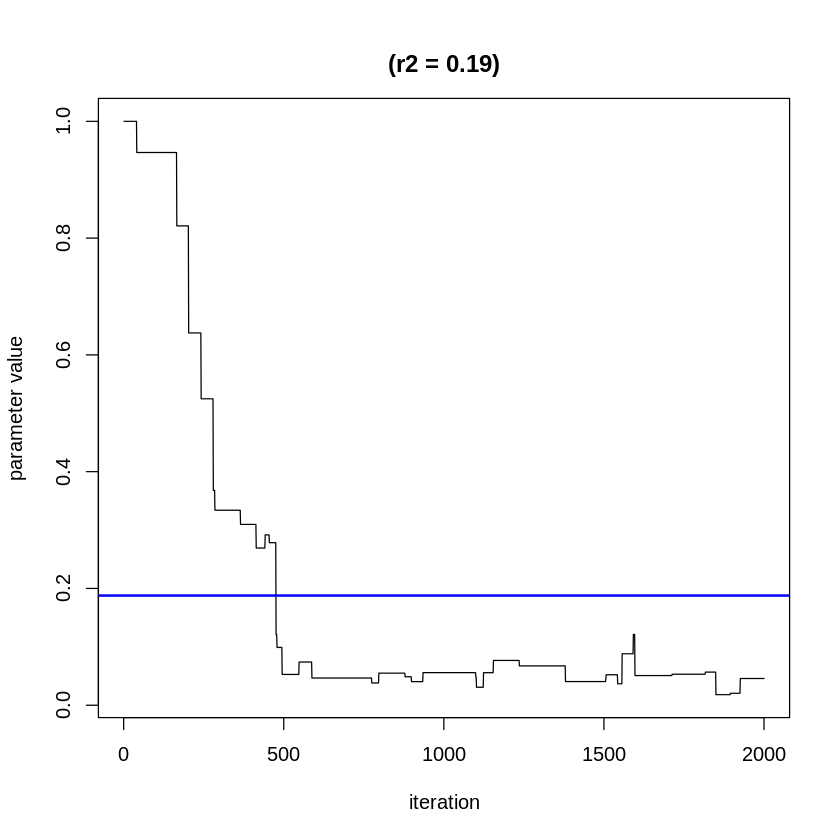

In [ ]:
TracePlot(fit_bkmr, par="r",comp=2,sel=1:2000)
# This traceplot helps you ensure that your posterior R² is well estimated (convergence)
# It gives you an interpretable measure of the overall “weight” of your contaminant mixture
# on the outcome of interest.

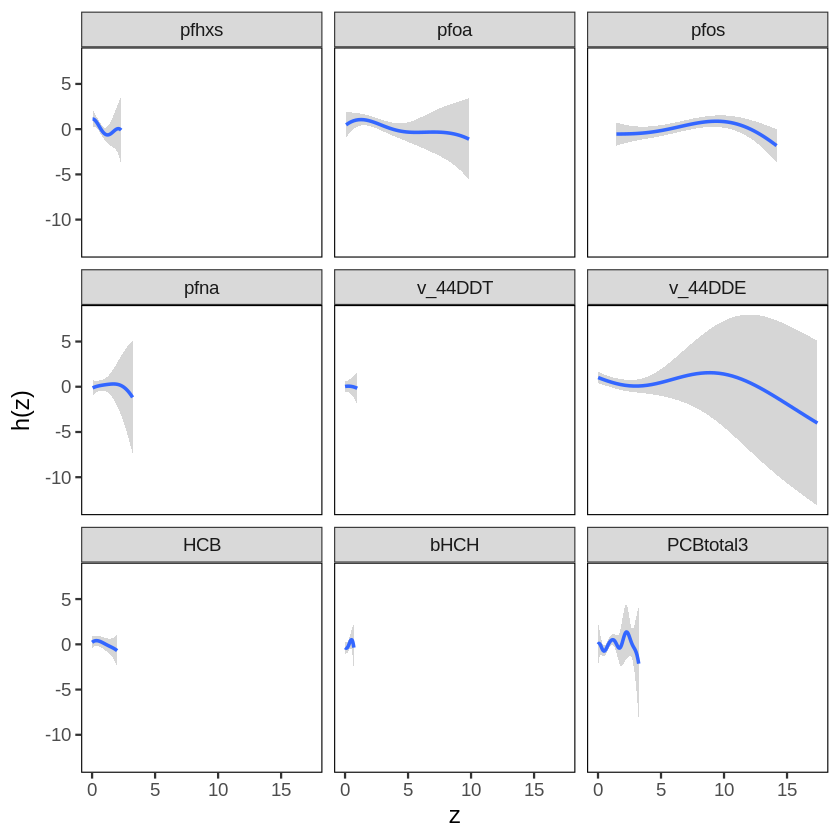

In [ ]:
pred.resp.univar <- PredictorResponseUnivar(fit = fit_bkmr,method="exact") # exact method give unbiaised results but is longer to run

ggplot(pred.resp.univar, aes(z, est, ymin = est - 1.96*se, ymax = est + 1.96*se)) +
  geom_smooth(stat = "identity") +
  facet_wrap(~ variable) +
  ylab("h(z)") +
  theme_bw(base_size = 14) +                                 # white background
  theme(
    panel.grid.major = element_blank(),                      # remove major grid lines
    panel.grid.minor = element_blank(),                      # remove minor grid lines
    panel.border = element_rect(colour = "black", fill = NA) # optional: add border
  )

In [ ]:
# 0. charging the libraries
library(readxl)
library(dplyr)
library(bkmr)

# (Re)fit the model if needed…
# fit_bkmr <- kmbayes(y = y, Z = Z, X = X, iter = 6000, varsel = TRUE, verbose = TRUE)

# 1. Prepare the out‐of‐sample data

datos2 <- read_excel("datos_limpios_3.xlsx")
dataset_nuevo <- datos2 %>%
  mutate(
    femb      = ifelse(femb == "Sí", 1, ifelse(femb == "No", 0, NA)),
    preterm   = ifelse(preterm == "sí", 1, ifelse(preterm == "no", 0, NA)),
    alcohol   = ifelse(alcohol == "Si", 1, ifelse(alcohol == "No", 0, NA)),
    CSMIX3    = case_when(
                  CSMIX3 == "CS I+II" ~ 1,
                  CSMIX3 == "CS III"  ~ 2,
                  CSMIX3 == "CS IV+V" ~ 3,
                  TRUE                ~ NA_real_),
    tipozonaM = case_when(
                  tipozonaM == "Rural"      ~ 1,
                  tipozonaM == "Semiurbana" ~ 2,
                  tipozonaM == "Urbana"     ~ 3,
                  TRUE                      ~ NA_real_)
  )
X_nuevo  <- as.matrix(dataset_nuevo[, c("femb", "preterm", "imcm2", "paridad")])
Z_nuevo  <- as.matrix(dataset_nuevo[, c("pfhxs", "pfoa", "pfos", "pfna",
                                        "v_44DDT", "v_44DDE", "HCB", "bHCH", "PCBtotal3")])
y_nuevo  <- dataset_nuevo$edad_menarquia

# 2. Predictions using the internal namespace
#    Note the triple colon ':::'
pred_insamp <- bkmr:::Predict(fit_bkmr, Xnew = X,    Znew = Z)
yhat_insamp <- pred_insamp$yhat

pred_new    <- bkmr:::Predict(fit_bkmr, Xnew = X_nuevo, Znew = Z_nuevo)
yhat_new    <- pred_new$yhat
yhat_lo     <- pred_new$yhat.lo
yhat_hi     <- pred_new$yhat.hi

# 3. Metrics calculations
n <- length(y_nuevo)
p <- ncol(X) + ncol(Z)

# In‐sample
R2_ins    <- cor(y, yhat_insamp)^2
R2adj_ins <- 1 - (1 - R2_ins)*(length(y)-1)/(length(y)-p-1)
MSE_ins   <- mean((y - yhat_insamp)^2)
RMSE_ins  <- sqrt(MSE_ins)
MAPE_ins  <- mean(abs((y - yhat_insamp)/y))*100

# Out‐of‐sample
R2_new    <- cor(y_nuevo, yhat_new)^2
R2adj_new <- 1 - (1 - R2_new)*(n-1)/(n-p-1)
MSE_new   <- mean((y_nuevo - yhat_new)^2)
RMSE_new  <- sqrt(MSE_new)
MAPE_new  <- mean(abs((y_nuevo - yhat_new)/y_nuevo))*100

# 4. Show results
cat("=== In-sample ===\n")
cat(sprintf("R2 = %.3f    R2aj = %.3f\nMSE = %.3f RMSE = %.3f MAPE = %.2f%%\n\n",
            R2_ins, R2adj_ins, MSE_ins, RMSE_ins, MAPE_ins))
cat("=== Out-of-sample ===\n")
cat(sprintf("R2 = %.3f    R2aj = %.3f\nMSE = %.3f RMSE = %.3f MAPE = %.2f%%\n",
            R2_new, R2adj_new, MSE_new, RMSE_new, MAPE_new))

# 5. Graph predicted vs observed
plot(y_nuevo, yhat_new,
     xlab = "Observado (edad_menarquia)",
     ylab = "Predicho (BKMR)",
     main = "BKMR: Predicción fuera de muestra")
abline(0, 1, lty = 2)

ERROR: Error: object 'Predict' not found
